Total number of rows in the DataFrame: 331213
Number of unique ClassIDs (Extracted from '_' and Sorted): 46
Distribution of each ClassID (Extracted from '_' and Sorted):
0      6134
1     16230
10    18665
11      921
12      152
13     4840
14     2510
15     3462
16     1457
17     1383
18     3363
19     6814
2      1483
20      112
21     4318
22     2569
23    46206
24     7195
25     1373
26      127
27     1176
28    10129
29     5960
3      1105
30      870
31    58810
32    27037
33    33903
34     3281
35     7965
36     3517
37     5079
38      528
39     1366
4      7808
40      587
41      272
42     4871
43     2403
44      929
45      335
5       720
6     12375
7      2731
8      5024
9      3118
Name: CleanedClassId, dtype: int64
Total count of ClassIDs: 331213
The total count of ClassIDs matches the number of rows in the DataFrame.


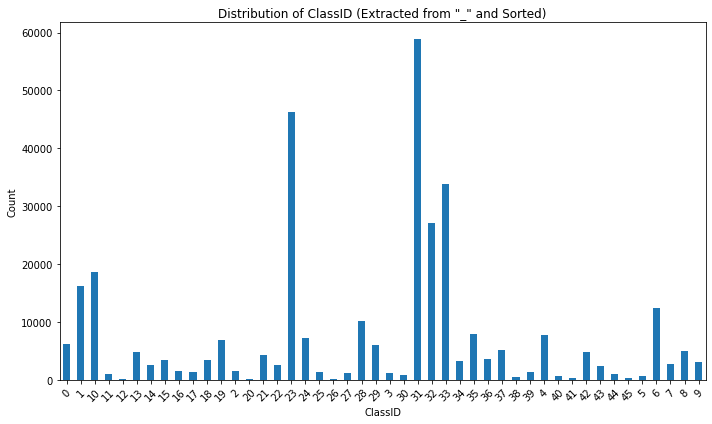

: 

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def extract_classid(classid):
    # Extract the starting number before the first occurrence of '_'
    return classid.split('_')[0]

def classid_distribution(csv_file_path):
    # Read the data from the CSV file into a Pandas DataFrame
    df = pd.read_csv(csv_file_path)

    # Get the total number of rows in the DataFrame
    total_rows = len(df)

    # Apply the extract_classid function to get the cleaned ClassIDs
    df['CleanedClassId'] = df['ClassId'].apply(extract_classid)

    # Get the unique CleanedClassID values and their counts, sorted in ascending order
    classid_counts = df['CleanedClassId'].value_counts().sort_index()

    # Get the number of unique CleanedClassID values
    num_unique_classids = len(classid_counts)

    # Calculate the sum of counts for each CleanedClassID
    total_count = classid_counts.sum()

    return df, total_rows, num_unique_classids, classid_counts, total_count

def plot_classid_distribution(classid_counts):
    plt.figure(figsize=(10, 6))
    classid_counts.plot(kind='bar')
    plt.xlabel('ClassID')
    plt.ylabel('Count')
    plt.title('Distribution of ClassID (Extracted from "_" and Sorted)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Replace 'train.csv' with the actual path to your dataset file
csv_file_path = 'train.csv'
cleaned_df, total_rows, num_unique_classids, classid_counts, total_count = classid_distribution(csv_file_path)

# Save the cleaned DataFrame to a new CSV file
cleaned_csv_file_path = 'cleaned_train.csv'
cleaned_df.to_csv(cleaned_csv_file_path, index=False)

print("Total number of rows in the DataFrame:", total_rows)
print("Number of unique ClassIDs (Extracted from '_' and Sorted):", num_unique_classids)
print("Distribution of each ClassID (Extracted from '_' and Sorted):")
print(classid_counts)
print("Total count of ClassIDs:", total_count)

# Compare the total count of ClassIDs with the number of rows in the DataFrame
if total_count == total_rows:
    print("The total count of ClassIDs matches the number of rows in the DataFrame.")
else:
    print("There are missing or duplicated ClassIDs in the DataFrame.")

plot_classid_distribution(classid_counts)


In [4]:
import pandas as pd

def count_rows_with_classid(df, classids):
    # Count the number of rows where ClassId is in the given list of classids
    count = df[df['ClassId'].isin(classids)].shape[0]
    return count

# Read the cleaned data from the CSV file into a Pandas DataFrame
csv_file_path = 'cleaned_train.csv'
df = pd.read_csv(csv_file_path)

# Define the list of ClassIDs to exclude
classids_to_exclude = ['13', '14', '15']

# Count the number of rows with ClassID 13, 14, or 15
count_classids = count_rows_with_classid(df, classids_to_exclude)
print("Number of rows with ClassID 13, 14, or 15:", count_classids)

# Get the total number of rows in the DataFrame
total_rows = len(df)
print("Total number of rows in the DataFrame:", total_rows)

# Remove the rows where ClassID is 13, 14, or 15
df_filtered = df[~df['ClassId'].isin(classids_to_exclude)]

# Save the filtered DataFrame to a new CSV file
new_csv_file_path = 'filtered_train.csv'
df_filtered.to_csv(new_csv_file_path, index=False)

# Get the new total number of rows after removal
new_total_rows = len(df_filtered)
print("New total number of rows after removal:", new_total_rows)

# Check if the new total rows match the previous total rows minus the count of ClassIDs
if new_total_rows == total_rows - count_classids:
    print("The new total rows match the previous total rows minus the count of ClassIDs.")
else:
    print("There might be an issue with the row removal process.")


Number of rows with ClassID 13, 14, or 15: 10812
Total number of rows in the DataFrame: 331213
New total number of rows after removal: 320401
The new total rows match the previous total rows minus the count of ClassIDs.
